Zavier Andrianarivo <br>
4/11/25 <br>
Professor Wallisch <br>
Homework \#4 <br>
Artificial Neural Networks on Predicting Diabetes

# Overview
Last homework, we used different types of models such as logistic regression, support vector machines, and different tree based models to predict diabetes. Now, given the same dataset, we'll be using different neural networks architectures (single-layer perceptron, feedforward, a \"deep\" neural network, CNN, and a network of our choice) to predict diabetes.

## Question \#1
Build and train a Perceptron (one input layer, one output layer, no hidden layers and no activation functions) to classify diabetes from the rest of the dataset. What is the AUC of this model? 


In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load dataset
data = pd.read_csv('./diabetes.csv')
df = pd.DataFrame(data)
data.head(n=10)

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8
5,0,1,1,25,1,0,0,1,1,1,...,0,2,0,2,0,2,10,6,8,2
6,0,1,0,30,1,0,0,0,0,0,...,0,3,0,14,0,1,9,6,7,4
7,0,1,1,25,1,0,0,1,0,1,...,0,3,0,0,1,1,11,4,4,7
8,1,1,1,30,1,0,1,0,1,1,...,0,5,30,30,1,1,9,5,1,12
9,0,0,0,24,0,0,0,0,0,1,...,0,2,0,0,0,2,8,4,3,12


In [4]:
# set X and y
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

print(f'X: \n{X}')
print(f'y: \n{y}')

X: 
        HighBP  HighChol  BMI  Smoker  Stroke  Myocardial  PhysActivity  \
0            1         1   40       1       0           0             0   
1            0         0   25       1       0           0             1   
2            1         1   28       0       0           0             0   
3            1         0   27       0       0           0             1   
4            1         1   24       0       0           0             1   
...        ...       ...  ...     ...     ...         ...           ...   
253675       1         1   45       0       0           0             0   
253676       1         1   18       0       0           0             0   
253677       0         0   28       0       0           0             1   
253678       1         0   23       0       0           0             0   
253679       1         1   25       0       0           1             1   

        Fruit  Vegetables  HeavyDrinker  ...  NotAbleToAffordDoctor  \
0           0           

In [5]:
# define train and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

clf = Perceptron(tol=1e-3, shuffle=True)

# train model
clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
print(f'Training Accuracy: {score:2f}')

Training Accuracy: 0.860311


Seeing the loss at 0.86, we can now test the model on the training data and see how the single layer perceptron performs

In [99]:
# import metrics to analyze model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_auc_score, average_precision_score

y_val_pred = clf.predict(X_val)

# calc metrics
perc_accuracy = accuracy_score(y_val, y_val_pred)
perc_confMatrix = confusion_matrix(y_val, y_val_pred)
perc_precision = precision_score(y_val, y_val_pred, zero_division=1)
perc_recall = recall_score(y_val, y_val_pred)
perc_f1 = f1_score(y_val, y_val_pred)
perc_mcc = matthews_corrcoef(y_val, y_val_pred)

# print metrics
print('******************** Perceptron Test Metrics ********************')
print(f'Perceptron Test Accuracy: {perc_accuracy}')
print(f'Perceptron Test Confusion Matrix: \n{perc_confMatrix}')
print(f'Perceptron Test Precision: {perc_precision}')
print(f'Perceptron Test Recall: {perc_recall}')
print(f'Perceptron Test F1: {perc_f1}')
print(f'Perceptron Test MCC: {perc_mcc}')


******************** Perceptron Test Metrics ********************
Perceptron Test Accuracy: 0.8615184484389783
Perceptron Test Confusion Matrix: 
[[21855     0]
 [ 3513     0]]
Perceptron Test Precision: 1.0
Perceptron Test Recall: 0.0
Perceptron Test F1: 0.0
Perceptron Test MCC: 0.0


In [7]:
# import roc and prc
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

ROC = RocCurveDisplay
PRC = PrecisionRecallDisplay

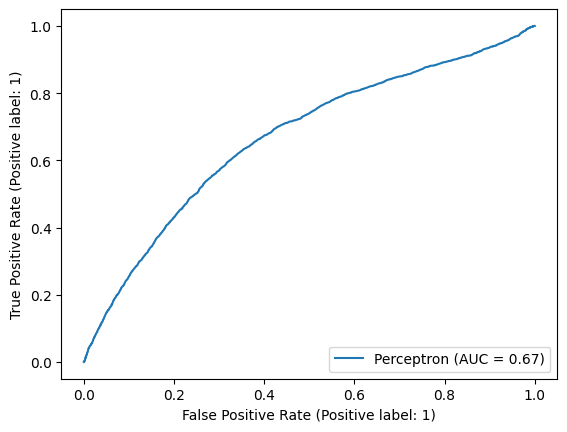

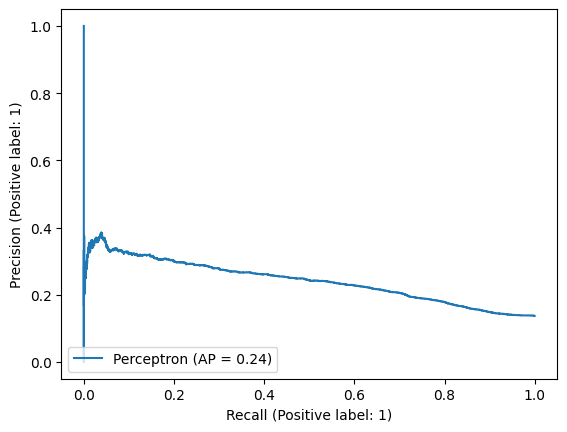

In [8]:
# print AUROC and AUPRC
ROC.from_estimator(clf, X_test, y_test)
PRC.from_estimator(clf, X_test, y_test)

## Question \#2
Build and train a feedforward neural network with at least one hidden layer to classify diabetes from the rest of the dataset. Make sure to try different numbers of hidden layers and different activation functions (at a minimum reLU and sigmoid). Doing so: How does AUC vary as a function of the number of hidden layers and is it dependent on the kind of activation function used (make sure to include “no activation function” in your comparison). How does this network perform relative to the Perceptron?

### Solution
First, lets start by defining the model.

In [9]:
# import nn module from torch
from torch import nn

# define our input dimensions (dimension of data)
numFeatures = df.shape[1] - 1 # 21
numClasses = 2
dense_nodes = 46 # keep things simple

# define our weights
# w = torch.Tensor(numFeatures)

learning_rate = 1e-2

model = nn.Sequential(
    nn.Linear(numFeatures, dense_nodes),
    nn.ReLU(),
    nn.Linear(dense_nodes, numClasses),
    nn.Softmax(dim=1) # return 1d-array with probability for either class
)

In [10]:
print(model)

Sequential(
  (0): Linear(in_features=21, out_features=46, bias=True)
  (1): ReLU()
  (2): Linear(in_features=46, out_features=2, bias=True)
  (3): Softmax(dim=1)
)


In [11]:
# let's process data and initialize our loss functions
numRows = df.shape[0]
X_train_nn = torch.as_tensor(X_train.values, dtype=torch.float)
X_test_nn = torch.as_tensor(X_test.values, dtype=torch.float)

# print to log data before training
print(X_train_nn)
print(X_test_nn)
print(f'X shape for forward feeding nn training: {X_train_nn.shape}')
print(f'X shape for forward feeding nn testing: {X_test_nn.shape}')

tensor([[ 0.,  1., 20.,  ...,  6.,  8., 12.],
        [ 0.,  0., 34.,  ...,  5.,  8.,  1.],
        [ 1.,  1., 24.,  ...,  5.,  6.,  5.],
        ...,
        [ 0.,  1., 25.,  ...,  6.,  8.,  7.],
        [ 0.,  0., 23.,  ...,  6.,  6., 12.],
        [ 1.,  0., 35.,  ...,  5.,  6.,  6.]])
tensor([[ 1.,  1., 28.,  ...,  6.,  8.,  8.],
        [ 0.,  1., 33.,  ...,  6.,  5., 11.],
        [ 0.,  1., 18.,  ...,  6.,  7., 11.],
        ...,
        [ 1.,  0., 28.,  ...,  5.,  8.,  2.],
        [ 0.,  0., 20.,  ...,  4.,  4., 12.],
        [ 0.,  1., 38.,  ...,  4.,  8.,  7.]])
X shape for forward feeding nn training: torch.Size([202944, 21])
X shape for forward feeding nn testing: torch.Size([25368, 21])


In [12]:
# set labels
labels = y_train.unique()

y_train_nn = torch.as_tensor(y_train.values, dtype=torch.long)
y_test_nn = torch.as_tensor(y_test.values, dtype=torch.long)

# once again, print processed data to make sure everything was processed properly
print(labels)
print(y_train_nn)
print(y_train_nn)

# some quick validation
if X_train_nn.shape[0] == y_train_nn.shape[0]:
    print(f'validation success:\nX: {X_train_nn.shape[0]}, y: {y_train_nn.shape}')
else:
    print(f'mismatch in data size:\nX{X_train_nn.shape[0]}, y: {y_train_nn.shape}')

[0 1]
tensor([0, 0, 1,  ..., 0, 0, 1])
tensor([0, 0, 1,  ..., 0, 0, 1])
validation success:
X: 202944, y: torch.Size([202944])


In [13]:
# import optim for gd
from torch import optim

print(torch.__version__)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss() # cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent

2.6.0


Now, we can define our forward feeding function

In [95]:
# import IPython for display during training loop
from IPython import display
import time

# training function
def train(model, X, y, criterion, optimizer, num_epochs=200):
    start_time = time.time()
    
    for epoch in range(num_epochs):  # run for num_epochs epochs
        epoch_start_time = time.time()  # Start the timer for each epoch
        
        model.train()  # Ensure the model is in training mode
        
        # Pass training data through the model
        y_pred = model(X)
        
        # Compute loss
        loss = criterion(y_pred, y)
        
        # Compute model predictions and accuracy
        _, predicted = torch.max(y_pred, 1)  # Get predicted class indices
        acc = (predicted == y).sum().item() / y.size(0)  # Accuracy calculation
        
        # Calculate epoch time
        epoch_time = time.time() - epoch_start_time
        
        # Calculate estimated time remaining
        elapsed_time = time.time() - start_time
        avg_epoch_time = elapsed_time / (epoch + 1)  # Average time per epoch so far
        remaining_epochs = num_epochs - (epoch + 1)
        estimated_time_remaining = avg_epoch_time * remaining_epochs
        
        # Convert the estimated time remaining to minutes and seconds
        minutes_remaining = int(estimated_time_remaining // 60)
        seconds_remaining = int(estimated_time_remaining % 60)
        
        # Print current epoch, loss, accuracy, and estimated time remaining
        print(f'[EPOCH]: {epoch + 1}/{num_epochs}, [LOSS]: {loss.item():.6f}, [ACCURACY]: {acc:.3f}')
        print(f'Estimated time remaining: {minutes_remaining}m {seconds_remaining}s')

        # Optionally clear output for progress visualization (if running in a notebook)
        display.clear_output(wait=True)
        
        # Zero the gradients before the backward pass
        optimizer.zero_grad()
        
        # Backpropagation: compute gradients
        loss.backward()
        
        # Update the model parameters
        optimizer.step()

    total_time = time.time() - start_time
    total_minutes = total_time / 60
    print(f'\nTraining completed in {total_minutes:.2f} minutes')

# testing function
def test(model, X, y, criterion):
    model.eval()
    
    with torch.no_grad():
        y_pred = model(X)
        loss = criterion(y_pred, y)

        # predicted class labels
        _, predicted = torch.max(y_pred, 1)

        # convert to numpy for sklearn
        y_true_np = y.cpu().numpy()
        y_pred_np = predicted.cpu().numpy()
        
        # calc class probabilities
        y_score = torch.softmax(y_pred, dim=1)  # default to multi-class softmax
        y_score_np = y_score.cpu().numpy()

        # Basic metrics
        acc = accuracy_score(y_true_np, y_pred_np)
        precision = precision_score(y_true_np, y_pred_np, average='macro')
        recall = recall_score(y_true_np, y_pred_np, average='macro')
        f1 = f1_score(y_true_np, y_pred_np, average='macro')

        # Detect binary vs multi-class
        is_binary = y_score_np.shape[1] == 2

        try:
            if is_binary:
                # for binary classification, use score of positive class (class 1)
                auroc = roc_auc_score(y_true_np, y_score_np[:, 1])
                auprc = average_precision_score(y_true_np, y_score_np[:, 1])

                RocCurveDisplay.from_predictions(y_true_np, y_score_np[:, 1])
                plt.title("ROC Curve")
                plt.show()

                PrecisionRecallDisplay.from_predictions(y_true_np, y_score_np[:, 1])
                plt.title("Precision-Recall Curve")
                plt.show()

            else:
                # Multi-class case: One-vs-Rest
                auroc = roc_auc_score(y_true_np, y_score_np, multi_class='ovr')
                auprc = average_precision_score(y_true_np, y_score_np, average='macro')

                # Binarize labels for plotting
                y_true_bin = label_binarize(y_true_np, classes=list(range(y_score_np.shape[1])))

                for i in range(y_score_np.shape[1]):
                    RocCurveDisplay.from_predictions(y_true_bin[:, i], y_score_np[:, i])
                    plt.title(f"ROC Curve - Class {i}")
                    plt.show()

                    PrecisionRecallDisplay.from_predictions(y_true_bin[:, i], y_score_np[:, i])
                    plt.title(f"Precision-Recall Curve - Class {i}")
                    plt.show()

        except ValueError as e:
            auroc = float('nan')
            auprc = float('nan')
            print(f"AUROC/AUPRC could not be computed: {e}")

        # Print metrics
        print(f'Test Loss: {loss.item():.6f}')
        print(f'Accuracy: {100 * acc:.2f}%')
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        print(f'AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}')

        return acc, precision, recall, f1, auroc, auprc

In [96]:
# train the model
train(model, X_train_nn, y_train_nn, criterion, optimizer)


Training completed in 0.14 minutes


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


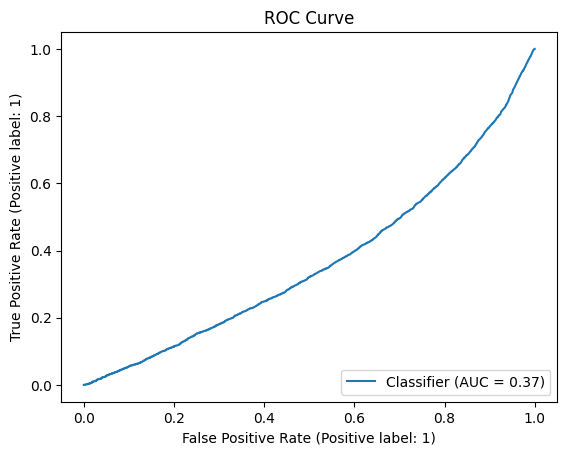

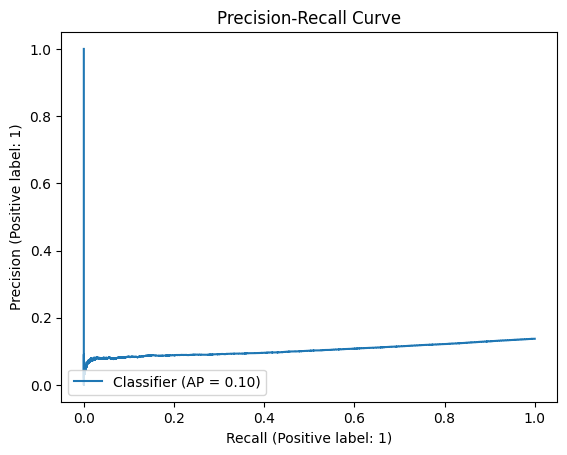

Test Loss: 0.450737
Accuracy: 86.27%
Precision: 0.4313, Recall: 0.5000, F1 Score: 0.4631
AUROC: 0.3675, AUPRC: 0.1040
********** FNN Metrics **********
MLP Accuracy: 0.8626616209397666
MLP Precision: 0.4313308104698833
MLP Recall: 0.5
MLP F1-Score: 0.4631338356048421


In [100]:
# test the model
acc, prec, recall, f1, auroc, auprc = test(model, X_test_nn, y_test_nn, criterion)

print(f'********** FNN Metrics **********')
print(f'MLP Accuracy: {acc}')
print(f'MLP Precision: {prec}')
print(f'MLP Recall: {recall}')
print(f'MLP F1-Score: {f1}')

Calculate the metrics of the model's performance using sklearn.metrics

In [18]:
from binary_nn_model import BinaryFNN

X_train_bnn = torch.as_tensor(X_train.values, dtype=torch.float32)
X_test_bnn = torch.as_tensor(X_train.values, dtype=torch.float32)

y_train_bnn = torch.as_tensor(y_train.values, dtype=torch.long)
y_test_bnn = torch.as_tensor(y_test.values, dtype=torch.long)

bnn = BinaryFNN(X_train_bnn, y_train_bnn, activation_func = 'sig')

bnn.X = X_train_bnn
bnn.y = y_train_bnn

bnn._train(X_train_bnn, num_epochs=200)
print()
bnn.test(X_test_bnn, y_test_bnn)

Epoch [1/200], Loss: 0.5284
Epoch [2/200], Loss: 0.5163
Epoch [3/200], Loss: 0.5056
Epoch [4/200], Loss: 0.4961
Epoch [5/200], Loss: 0.4875
Epoch [6/200], Loss: 0.4799
Epoch [7/200], Loss: 0.4731
Epoch [8/200], Loss: 0.4669
Epoch [9/200], Loss: 0.4614
Epoch [10/200], Loss: 0.4565
Epoch [11/200], Loss: 0.4520
Epoch [12/200], Loss: 0.4479
Epoch [13/200], Loss: 0.4443
Epoch [14/200], Loss: 0.4410
Epoch [15/200], Loss: 0.4380
Epoch [16/200], Loss: 0.4352
Epoch [17/200], Loss: 0.4327
Epoch [18/200], Loss: 0.4305
Epoch [19/200], Loss: 0.4284
Epoch [20/200], Loss: 0.4265
Epoch [21/200], Loss: 0.4248
Epoch [22/200], Loss: 0.4232
Epoch [23/200], Loss: 0.4217
Epoch [24/200], Loss: 0.4204
Epoch [25/200], Loss: 0.4192
Epoch [26/200], Loss: 0.4181
Epoch [27/200], Loss: 0.4170
Epoch [28/200], Loss: 0.4161
Epoch [29/200], Loss: 0.4152
Epoch [30/200], Loss: 0.4144
Epoch [31/200], Loss: 0.4137
Epoch [32/200], Loss: 0.4130
Epoch [33/200], Loss: 0.4123
Epoch [34/200], Loss: 0.4118
Epoch [35/200], Loss: 0

## Question \#3
Build and train a “deep” network (at least 2 hidden layers) to classify diabetes from the rest of the dataset. Given the nature of this dataset, is there a benefit of using a CNN for the classification? 

## Functions to implement and what they tell us:
### Z-Score:
$$
z = \frac{x - \mu_{x}}{\sigma} \\
$$
Transforms the distribution of a vector into the normal distribution with $\mathbb{E}(X) = 0$ and $\sigma = 1$. <br>
### Min-Max Scaling:
$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}\\
$$
Scales our data from 0 to 1, which can be helpful given working with a binary class distribution of output labels. <br>
### Cosine-Similarity:
$$
\theta = \arccos(\frac{\vec{u} \cdot \vec{v}}{||\vec{u}|| \cdot ||\vec{v}||})
$$
Computes the angle between two vectors. Given $\vec{v} \cdot \vec{u} = 0$ tells if the vectors are orthogonal, if $\cos(\theta) = 0$, then we know the vectors are orthogonal. Vice-versa, if $\cos(\theta) \approx 1$, then we know they lie within the same span - indicating some linear relationship between the vectors. This can help tremendously with dimensionality reduction with Principal Component Analysis before feeding the data into our CNN.

In [19]:
# let's visualize the data first, once again - visualizing the relationships between the features
# we'll try something different to analyze the input features

# z-score function
def z_score(x):
    return (x - np.mean(x))/np.std(x)

# min-max scaling function
def min_max_scaling(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

# cosine similarity == arccos((u * v)/(||u|| * ||v||))
def cosine_similarity(u, v):
    '''
    we'll convert everything to numpy arrays to make 
    the computations easier
    '''
    # compute dot product
    u = np.array(u)
    v = np.array(v)
    dot = np.dot(u, v)

    # calc magnitudes of u, v
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)

    # return theta
    return np.arccos((dot)/(norm_u * norm_v))

In [20]:
# test our cosine similarity function on general and mental health
gh_mh_theta = cosine_similarity(X.iloc[:, 12], X.iloc[:, 13])
print(f'Cosine Similarity of General Health, Mental Health Features:\n{gh_mh_theta:.2f}')

print()

# test on general health, physical health
gh_ph_theta = cosine_similarity(X.iloc[:, 12], X.iloc[:, 14])
print(f'Cosine Similarity of General Health, Physical Health Features:\n{gh_ph_theta:.2f}')

Cosine Similarity of General Health, Mental Health Features:
1.08

Cosine Similarity of General Health, Physical Health Features:
0.94


Let\'s do a little more pre-processing before testing all of the functions on our features.
<hr>
It makes sense to center each vector of the input matrix around the origin so we get accurate cosine similarity computations between each vector.

Let\'s first start with checking the mean of each vector and outputting it to the notebook.

In [21]:
# check means of each vector
X_arr = np.array(X)
for feature in range(X_arr.shape[1]):
    print(f"Mean of {df.columns[feature]} feature: {np.mean(X_arr[:, feature]):.3f}")

Mean of Diabetes feature: 0.429
Mean of HighBP feature: 0.424
Mean of HighChol feature: 28.382
Mean of BMI feature: 0.443
Mean of Smoker feature: 0.041
Mean of Stroke feature: 0.094
Mean of Myocardial feature: 0.757
Mean of PhysActivity feature: 0.634
Mean of Fruit feature: 0.811
Mean of Vegetables feature: 0.056
Mean of HeavyDrinker feature: 0.951
Mean of HasHealthcare feature: 0.084
Mean of NotAbleToAffordDoctor feature: 2.511
Mean of GeneralHealth feature: 3.185
Mean of MentalHealth feature: 4.242
Mean of PhysicalHealth feature: 0.168
Mean of HardToClimbStairs feature: 1.440
Mean of BiologicalSex feature: 8.032
Mean of AgeBracket feature: 5.050
Mean of EducationBracket feature: 6.054
Mean of IncomeBracket feature: 6.504


Seeing the means, we can now make some assumptions about the dataset:

    *Diabetes mean of 0.429 indicates majority of samples are 0, indicating class imbalance (roughly 60/40)
    *BP mean ~ Diabetes mean, could be a direct contributor to indicating
    *Biological Sex feature indicates the majority label for this feature is 2? We can check that.

In [22]:
print(df['BiologicalSex'].value_counts())

1    141974
2    111706
Name: BiologicalSex, dtype: int64


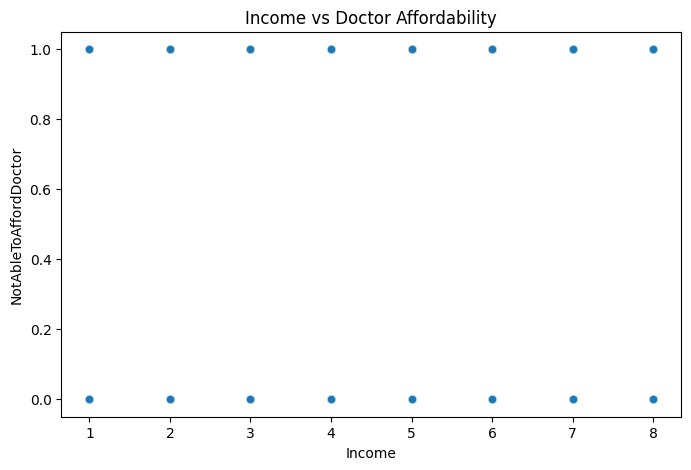

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add small random noise (jitter) to diabetes
# jittered_diabetes = df['Diabetes'] + np.random.normal(0, 0.05, size=len(df))

# plot BMI vs Diabetes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='IncomeBracket', y='NotAbleToAffordDoctor', data=df, alpha=0.4)
plt.title('Income vs Doctor Affordability')
plt.xlabel('Income')
plt.ylabel('NotAbleToAffordDoctor')
plt.show()

Since the scatter doesn't provide much at all, let's analyze the data using cosine-similarity among the vectors.

In [24]:
X_unprocessed = df.drop(columns=['Diabetes'])
y_unprocessed = df['Diabetes']

# print to make sure
print(f'X: {X_unprocessed}')
print(f'y: {y_unprocessed}')

X:         HighBP  HighChol  BMI  Smoker  Stroke  Myocardial  PhysActivity  \
0            1         1   40       1       0           0             0   
1            0         0   25       1       0           0             1   
2            1         1   28       0       0           0             0   
3            1         0   27       0       0           0             1   
4            1         1   24       0       0           0             1   
...        ...       ...  ...     ...     ...         ...           ...   
253675       1         1   45       0       0           0             0   
253676       1         1   18       0       0           0             0   
253677       0         0   28       0       0           0             1   
253678       1         0   23       0       0           0             0   
253679       1         1   25       0       0           1             1   

        Fruit  Vegetables  HeavyDrinker  ...  NotAbleToAffordDoctor  \
0           0           1

In [25]:
# convert to np arrays
X_matrix = np.array(X_unprocessed)
y_vec = np.array(y_unprocessed)

print(f'Matrix X: \n{X_matrix}')
print(f'Vector y: \n{y_vec}')

Matrix X: 
[[ 1  1 40 ...  4  3 10]
 [ 0  0 25 ...  6  1 11]
 [ 1  1 28 ...  4  8  2]
 ...
 [ 0  0 28 ...  5  2  5]
 [ 1  0 23 ...  5  1  6]
 [ 1  1 25 ...  6  2  6]]
Vector y: 
[0 0 0 ... 0 0 1]


Let's scale and then normalize before performing cosine-similarity on the vectors of X

In [26]:
# scale our continuous data (looking at mean of these vectors)
continuous_features = ['HighChol', 'BMI', 'NotAbleToAffordDoctor', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs','AgeBracket', 'EducationBracket', 'IncomeBracket']

# scale features
for feature in continuous_features:
    X_unprocessed[feature] = min_max_scaling(X_unprocessed[feature])

print(f'Data after scaling: {X_unprocessed}')

Data after scaling:         HighBP  HighChol       BMI  Smoker  Stroke  Myocardial  PhysActivity  \
0            1       1.0  0.325581       1       0           0             0   
1            0       0.0  0.151163       1       0           0             1   
2            1       1.0  0.186047       0       0           0             0   
3            1       0.0  0.174419       0       0           0             1   
4            1       1.0  0.139535       0       0           0             1   
...        ...       ...       ...     ...     ...         ...           ...   
253675       1       1.0  0.383721       0       0           0             0   
253676       1       1.0  0.069767       0       0           0             0   
253677       0       0.0  0.186047       0       0           0             1   
253678       1       0.0  0.127907       0       0           0             0   
253679       1       1.0  0.151163       0       0           1             1   

        Fruit  Vege

In [27]:
# check means, standardize, then check means once again
X_matrix = np.array(X_unprocessed)
for feature in range(X_arr.shape[1]):
    print(f"Mean of {df.columns[feature]} feature: {np.mean(X_matrix[:, feature]):.3f}")

# standardize
print()
for feature in range(X_matrix.shape[1]):
    X_matrix[:, feature] = z_score(X_matrix[:, feature])

# check again
for feature in range(X_matrix.shape[1]):
    print(f'Standardized Mean and Std of {df.columns[feature]} feature: {np.mean(X_matrix[:, feature]):.3f} | Std: {np.std(X_matrix[:, feature]):.2f}')

Mean of Diabetes feature: 0.429
Mean of HighBP feature: 0.424
Mean of HighChol feature: 0.190
Mean of BMI feature: 0.443
Mean of Smoker feature: 0.041
Mean of Stroke feature: 0.094
Mean of Myocardial feature: 0.757
Mean of PhysActivity feature: 0.634
Mean of Fruit feature: 0.811
Mean of Vegetables feature: 0.056
Mean of HeavyDrinker feature: 0.951
Mean of HasHealthcare feature: 0.084
Mean of NotAbleToAffordDoctor feature: 0.378
Mean of GeneralHealth feature: 0.106
Mean of MentalHealth feature: 0.141
Mean of PhysicalHealth feature: 0.168
Mean of HardToClimbStairs feature: 1.440
Mean of BiologicalSex feature: 0.586
Mean of AgeBracket feature: 0.810
Mean of EducationBracket feature: 0.722
Mean of IncomeBracket feature: 6.504

Standardized Mean and Std of Diabetes feature: -0.000 | Std: 1.00
Standardized Mean and Std of HighBP feature: 0.000 | Std: 1.00
Standardized Mean and Std of HighChol feature: 0.000 | Std: 1.00
Standardized Mean and Std of BMI feature: 0.000 | Std: 1.00
Standardized 

We can now see the matrix is mean-centered around 0.

Let\'s calculate the cosine similarity between the vectors to see what components we can turn into prinicpal components.

Covariance Matrix Shape: (21, 21)


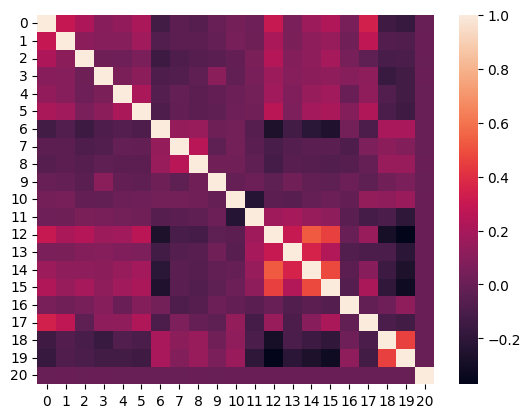

In [28]:
# get our covariance matrix
cov = np.cov(X_matrix, rowvar=False)
print(f'Covariance Matrix Shape: {cov.shape}')

# plot heatmap of covariance
sns.heatmap(cov)
plt.show()

Since we don\'t know how many principal components we want yet, we\'ll extract the principal components first and then use cosine-similarity to essentially validate PCA on our covariance matrix.

We can use our covariance matrix as the "input" for SVD, where we will work to decompose the matrix into the following:
$$
A = U \Sigma V^{T}
$$

or for our case:
$$
Cov(X) = U \Sigma V^{T}
$$

In [29]:
# compute pca using covariance matrix
def PCA(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # index the eigenvalues in descending order 
    idx = eigenvalues.argsort()[::-1]
    
    # Sort the eigenvalues in descending order 
    eigenvalues = eigenvalues[idx]
    
    # sort the corresponding eigenvectors accordingly
    eigenvectors = eigenvectors[:, idx]
    
    explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    n_components = np.argmax(explained_var >= 0.60) + 1

    # return our optimal # principal components
    return n_components, eigenvectors, explained_var

In [30]:
numPC, eigenvectors, explained_var = PCA(cov)
print(numPC)

9


In [31]:
principal_components = eigenvectors[:, :numPC]
print(f'Shape of principal components: {principal_components.shape}')
X_pca = np.dot(X_matrix, principal_components)

print(f'Shape of X_pca: {X_pca.shape}')
print(f'X_pca: \n{X_pca}')

Shape of principal components: (21, 9)
Shape of X_pca: (253680, 9)
X_pca: 
[[-4.77269689  0.49396039 -0.26774082 ... -1.75722652 -1.06815029
   0.58818862]
 [-0.79262428  4.25294799  1.25190507 ...  0.65922029 -1.26349008
  -1.79592832]
 [-4.93947004  1.92849307 -1.90017037 ... -0.44131509  1.30724296
  -1.74182326]
 ...
 [ 1.30839857  1.85667356  0.27076275 ...  0.73871767  0.49055108
  -0.39166565]
 [-0.45784354  0.15712272  0.15751728 ...  0.04223485  0.12727493
   0.95056459]
 [-0.77306394 -1.59863759  0.25510217 ...  1.04505378  0.18712582
  -1.89498704]]


In [32]:
# double check the # of samples matches w # labels
if (X_pca.shape[0] == y.shape[0]):
    print(f'Shapes match: X = {X_pca.shape[0]}, y = {y.shape[0]}')
else:
    raise ValueError(f'Shape mismatch: X = {X_pca.shape[0]}, y = {y.shape[0]}')

Shapes match: X = 253680, y = 253680


Now that we the original input matrix transformed after performing PCA, we can import our CNN class and test it on the PCA transformed X (I'm hoping so bad that this works lol)

In [33]:
# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

# convert data to pytorch tensors
# training data
X_train_tensor = torch.as_tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.as_tensor(y_train.values, dtype=torch.long)
X_train_tensor = X_train_tensor.unsqueeze(1)

# test data
X_test_tensor = torch.as_tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.as_tensor(y_test.values, dtype=torch.long)
X_test_tensor = X_test_tensor.unsqueeze(1)

print("Input shape:", X_train_tensor.shape)
print("Test shape:", X_test_tensor.shape)

Input shape: torch.Size([202944, 1, 9])
Test shape: torch.Size([50736, 1, 9])


In [34]:
# import our model
from cnn_model import ConvolutionalNeuralNetwork

in_channel = X_train.shape[1]
out_channel = 2

cnn = ConvolutionalNeuralNetwork(X_train_tensor, y_train_tensor, in_channel, out_channel)

cnn.X = X_train_tensor
cnn.y = y_train_tensor

In [35]:
print("Input shape:", X_train_tensor.shape)

Input shape: torch.Size([202944, 1, 9])


In [36]:
# train the model
cnn._train(num_epochs=200)

Epoch [1/200], Loss: 0.6823
Epoch [2/200], Loss: 0.5980
Epoch [3/200], Loss: 0.5039
Epoch [4/200], Loss: 0.4120
Epoch [5/200], Loss: 0.4884
Epoch [6/200], Loss: 0.4483
Epoch [7/200], Loss: 0.4019
Epoch [8/200], Loss: 0.3971
Epoch [9/200], Loss: 0.4069
Epoch [10/200], Loss: 0.4111
Epoch [11/200], Loss: 0.4062
Epoch [12/200], Loss: 0.3943
Epoch [13/200], Loss: 0.3804
Epoch [14/200], Loss: 0.3713
Epoch [15/200], Loss: 0.3715
Epoch [16/200], Loss: 0.3750
Epoch [17/200], Loss: 0.3713
Epoch [18/200], Loss: 0.3608
Epoch [19/200], Loss: 0.3515
Epoch [20/200], Loss: 0.3476
Epoch [21/200], Loss: 0.3470
Epoch [22/200], Loss: 0.3458
Epoch [23/200], Loss: 0.3423
Epoch [24/200], Loss: 0.3378
Epoch [25/200], Loss: 0.3354
Epoch [26/200], Loss: 0.3362
Epoch [27/200], Loss: 0.3375
Epoch [28/200], Loss: 0.3361
Epoch [29/200], Loss: 0.3334
Epoch [30/200], Loss: 0.3322
Epoch [31/200], Loss: 0.3326
Epoch [32/200], Loss: 0.3327
Epoch [33/200], Loss: 0.3313
Epoch [34/200], Loss: 0.3295
Epoch [35/200], Loss: 0

In [37]:
# test cnn
acc, y_pred, y_true, y_pred_proba = cnn.test(X_test_tensor, y_test_tensor)

Test Accuracy: 86.58%


********** CNN Performance Metrics **********
Precision: 0.5442
Recall: 0.1372
F1 Score: 0.2191
MCC: 0.2238


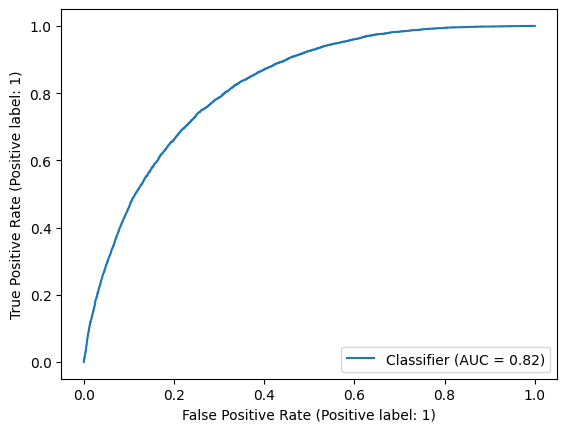

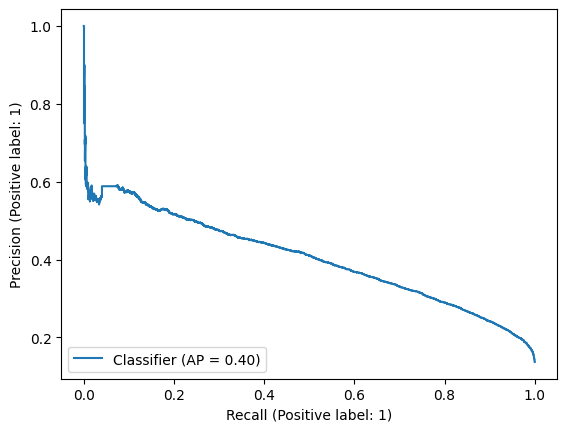

In [38]:
# print metrics
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay

# cow compute the metrics
cnn_precision = precision_score(y_true, y_pred)
cnn_recall = recall_score(y_true, y_pred)
cnn_f1 = f1_score(y_true, y_pred)
cnn_mcc = matthews_corrcoef(y_true, y_pred)

# print results
print(f'********** CNN Performance Metrics **********')
print(f'Precision: {cnn_precision:.4f}')
print(f'Recall: {cnn_recall:.4f}')
print(f'F1 Score: {cnn_f1:.4f}')
print(f'MCC: {cnn_mcc:.4f}')

# print AUC
# print AUROC and AUPRC
RocCurveDisplay.from_predictions(y_test_tensor, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test_tensor, y_pred_proba)

## Question \#4
Build and train a feedforward neural network with one hidden layer to predict BMI from the rest of the dataset. Use RMSE to assess the accuracy of your model. Does the RMSE depend on the activation function used? 

In [65]:
# we can set y = BMI and drop the diabetes (based on the fact we're using the rest of the dataset)
# set our input matrix and target vectors
bmi_data = pd.read_csv('./diabetes.csv')
df = pd.DataFrame(data = bmi_data)

df.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [66]:
df.drop(columns = ['Diabetes'])

,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1,1,40,1,0,0,0,0,1,0,...,0,5,18,15,1,1,9,4,3,10
1,0,0,25,1,0,0,1,0,0,0,...,1,3,0,0,0,1,7,6,1,11
2,1,1,28,0,0,0,0,1,0,0,...,1,5,30,30,1,1,9,4,8,2
3,1,0,27,0,0,0,1,1,1,0,...,0,2,0,0,0,1,11,3,6,11
4,1,1,24,0,0,0,1,1,1,0,...,0,2,3,0,0,1,11,5,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,45,0,0,0,0,1,1,0,...,0,3,0,5,0,2,5,6,7,11
253676,1,1,18,0,0,0,0,0,0,0,...,0,4,0,0,1,1,11,2,4,6
253677,0,0,28,0,0,0,1,1,0,0,...,0,1,0,0,0,1,2,5,2,5
253678,1,0,23,0,0,0,0,1,1,0,...,0,3,0,0,0,2,7,5,1,6


In [67]:
y_bmi = df['BMI']
X_bmi = df.drop(columns = ['Diabetes', 'BMI'])

print(f'X: \n{X_bmi}')
print(f'y: \n{y_bmi}')

X: 
        HighBP  HighChol  Smoker  Stroke  Myocardial  PhysActivity  Fruit  \
0            1         1       1       0           0             0      0   
1            0         0       1       0           0             1      0   
2            1         1       0       0           0             0      1   
3            1         0       0       0           0             1      1   
4            1         1       0       0           0             1      1   
...        ...       ...     ...     ...         ...           ...    ...   
253675       1         1       0       0           0             0      1   
253676       1         1       0       0           0             0      0   
253677       0         0       0       0           0             1      1   
253678       1         0       0       0           0             0      1   
253679       1         1       0       0           1             1      1   

        Vegetables  HeavyDrinker  HasHealthcare  NotAbleToAffordDoctor 

In [68]:
# let's preprocess some of our data, since we're working with a simpler MLP, we don't need to perform PCA
## (working w/ less layers [no convolutional layer])

# get mean_centered data
X_bmi = (X_bmi - X_bmi.mean(axis=0)) / X_bmi.std(axis=0)

# features to scale - based on previous analysis
theta_between_gm = cosine_similarity(X_bmi['GeneralHealth'], X_bmi['MentalHealth'])
theta_between_gp = cosine_similarity(X_bmi['GeneralHealth'], X_bmi['PhysicalHealth'])
theta_between_mp = cosine_similarity(X_bmi['MentalHealth'], X_bmi['PhysicalHealth'])

# output thetas
print(f'angle between general health & mental health {theta_between_gm}')
print(f'angle between general health & physical health {theta_between_gp}')
print(f'angle between mental health & physical health {theta_between_mp}')

angle between general health & mental health 1.2643479460331948
angle between general health & physical health 1.0188287261739337
angle between mental health & physical health 1.2093592038400125


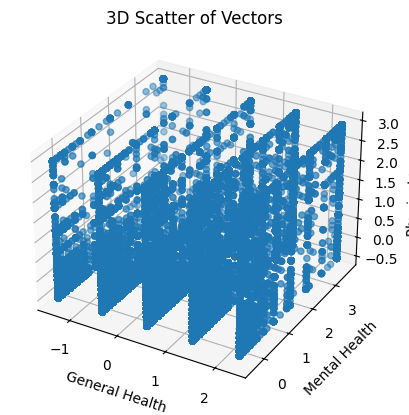

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_bmi['GeneralHealth'], X_bmi['MentalHealth'], X_bmi['PhysicalHealth'])

ax.set_xlabel('General Health')
ax.set_ylabel('Mental Health')
ax.set_zlabel('Physical Health')
ax.set_title("3D Scatter of Vectors")

plt.show()

We can see that all of angles are around 1, indicating there is collinearity between these vectors. The 3d projection also shows relative parallelism between the vectors.

We can combine these vectors using PCA or even simpler, maybe just even finding the average between the 3 vectors.

In [70]:
# reduce to one vector and then add back to dataset
from sklearn.decomposition import PCA

X_collinear = X_bmi[['GeneralHealth', 'MentalHealth', 'PhysicalHealth']]

# perform pca
pca = PCA(n_components=1)
X_pca_collinear = pca.fit_transform(X_collinear)

# add it back
X_bmi['HealthPCA'] = X_pca_collinear

# drop columns since they're now combined with PCA
X_bmi_reduced = X_bmi.drop(columns=['GeneralHealth', 'MentalHealth', 'PhysicalHealth'])
print(X_bmi_reduced)

          HighBP  HighChol    Smoker    Stroke  Myocardial  PhysActivity  \
0       1.153686  1.165252  1.120925 -0.205636   -0.322457     -1.762810   
1      -0.866784 -0.858180  1.120925 -0.205636   -0.322457      0.567274   
2       1.153686  1.165252 -0.892117 -0.205636   -0.322457     -1.762810   
3       1.153686 -0.858180 -0.892117 -0.205636   -0.322457      0.567274   
4       1.153686  1.165252 -0.892117 -0.205636   -0.322457      0.567274   
...          ...       ...       ...       ...         ...           ...   
253675  1.153686  1.165252 -0.892117 -0.205636   -0.322457     -1.762810   
253676  1.153686  1.165252 -0.892117 -0.205636   -0.322457     -1.762810   
253677 -0.866784 -0.858180 -0.892117 -0.205636   -0.322457      0.567274   
253678  1.153686 -0.858180 -0.892117 -0.205636   -0.322457     -1.762810   
253679  1.153686  1.165252 -0.892117 -0.205636    3.101177      0.567274   

           Fruit  Vegetables  HeavyDrinker  HasHealthcare  \
0      -1.316869    0.4820

In [71]:
from sklearn.model_selection import train_test_split

# split data
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi_reduced, y_bmi, test_size = 0.2, random_state = 14173755)

# turn data into torch tensors for model
X_bmi_train_tensor = torch.as_tensor(X_bmi_train.values, dtype = torch.float32)
y_bmi_train_tensor = torch.as_tensor(y_bmi_train.values, dtype = torch.float32)

X_bmi_test_tensor = torch.as_tensor(X_bmi_test.values, dtype = torch.float32)
y_bmi_test_tensor = torch.as_tensor(y_bmi_test.values, dtype = torch.float32)

In [72]:
# import multiple models
from randomized_nn_model import RandomizedFNN

rfnn = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor)
rfnn_batch_2 = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor)
rfnn_batch_3 = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor)
rfnn_batch_4 = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor)

# first batch
rfnn.X = X_bmi_train_tensor
rfnn.y = y_bmi_train_tensor

# second batch
rfnn_batch_2.X = X_bmi_train_tensor
rfnn_batch_2.y = y_bmi_train_tensor

# last batch
rfnn_batch_3.X = X_bmi_train_tensor
rfnn_batch_3.y = y_bmi_train_tensor

rfnn_batch_4.X = X_bmi_train_tensor
rfnn_batch_4.y = y_bmi_train_tensor

In [73]:
# let's train multiple models with random activations and see how it performs (with different num epochs as well)
# batch 1
rfnn._train(num_epochs=200)

# batch 2
rfnn_batch_2._train(num_epochs=200)

# batch 3
rfnn_batch_3._train(num_epochs=100)

# batch 3
rfnn_batch_4._train(num_epochs=300)

Sequential(
  (0): Linear(in_features=18, out_features=36, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=36, out_features=36, bias=True)
  (3): ReLU()
  (4): Linear(in_features=36, out_features=36, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=36, out_features=1, bias=True)
)
Epoch [1/200], Loss: 856.7877
Epoch [2/200], Loss: 563.5603
Epoch [3/200], Loss: 365.8166
Epoch [4/200], Loss: 228.0593
Epoch [5/200], Loss: 136.7225
Epoch [6/200], Loss: 81.5382
Epoch [7/200], Loss: 53.9516
Epoch [8/200], Loss: 44.1265
Epoch [9/200], Loss: 41.7293
Epoch [10/200], Loss: 41.0999
Epoch [11/200], Loss: 40.7693
Epoch [12/200], Loss: 40.5175
Epoch [13/200], Loss: 40.3115
Epoch [14/200], Loss: 40.1399
Epoch [15/200], Loss: 39.9957
Epoch [16/200], Loss: 39.8736
Epoch [17/200], Loss: 39.7694
Epoch [18/200], Loss: 39.6799
Epoch [19/200], Loss: 39.6027
Epoch [20/200], Loss: 39.5358
Epoch [21/200], Loss: 39.4775
Epoch [22/200], Loss: 39.4265
Epoch [23/200], Loss: 39.3817
Epoch [24/200], 

In [74]:
rfnn.test(X_bmi_test_tensor, y_bmi_test_tensor)
rfnn_batch_2.test(X_bmi_test_tensor, y_bmi_test_tensor)
rfnn_batch_3.test(X_bmi_test_tensor, y_bmi_test_tensor)
rfnn_batch_4.test(X_bmi_test_tensor, y_bmi_test_tensor)

Test Loss: 37.525242
Test Loss: 37.555630
Test Loss: 38.769650
Test Loss: 37.311306


## Question \#5
Build and train a neural network of your choice to predict BMI from the rest of your dataset. How low can you get RMSE and what design choices does RMSE seem to depend on?

In [75]:
# we'll implement a deeper FNN to train on BMI, but also one with standard relu, and one with random activations.
# we'll also play around with the training epochs and see how our RMSE differs based on # epochs
from randomized_nn_model import RandomizedFNN
from nn_model import FNN

# 3 hidden layers
fnn_clf_3 = FNN(X_bmi_train_tensor, y_bmi_train_tensor)
rfnn_clf_3 = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor)

fnn_clf_3.X = X_bmi_train_tensor
fnn_clf_3.y = y_bmi_train_tensor

rfnn_clf_3.X = X_bmi_train_tensor
rfnn_clf_3.y = y_bmi_train_tensor

# 4 hidden layers
fnn_clf_4 = FNN(X_bmi_train_tensor, y_bmi_train_tensor, numHiddenLayers = 4)
rfnn_clf_4 = RandomizedFNN(X_bmi_train_tensor, y_bmi_train_tensor, numHiddenLayers = 4)

fnn_clf_4.X = X_bmi_train_tensor
fnn_clf_4.y = y_bmi_train_tensor

rfnn_clf_4.X = X_bmi_train_tensor
rfnn_clf_4.y = y_bmi_train_tensor

In [76]:
# 200 epochs for "standard" network
fnn_clf_3._train()
rfnn_clf_3._train()

# we'll reduce the size of the epochs on the network with more layers
fnn_clf_4._train(num_epochs = 100)
rfnn_clf_4._train(num_epochs = 100)

Epoch [1/200], Loss: 856.1902
Epoch [2/200], Loss: 787.5620
Epoch [3/200], Loss: 672.0135
Epoch [4/200], Loss: 309.3618
Epoch [5/200], Loss: 2254.8882
Epoch [6/200], Loss: 1836.9645
Epoch [7/200], Loss: 751.0082
Epoch [8/200], Loss: 722.3359
Epoch [9/200], Loss: 265.0567
Epoch [10/200], Loss: 689.3422
Epoch [11/200], Loss: 663.6973
Epoch [12/200], Loss: 639.0469
Epoch [13/200], Loss: 615.3286
Epoch [14/200], Loss: 592.4561
Epoch [15/200], Loss: 570.2018
Epoch [16/200], Loss: 536.1680
Epoch [17/200], Loss: 10918587.0000
Epoch [18/200], Loss: 5636.9185
Epoch [19/200], Loss: 5414.8672
Epoch [20/200], Loss: 5201.9541
Epoch [21/200], Loss: 4997.3369
Epoch [22/200], Loss: 4800.3618
Epoch [23/200], Loss: 4610.1055
Epoch [24/200], Loss: 4424.9199
Epoch [25/200], Loss: 4241.5786
Epoch [26/200], Loss: 4053.5449
Epoch [27/200], Loss: 3847.8240
Epoch [28/200], Loss: 3600.5686
Epoch [29/200], Loss: 3276.4890
Epoch [30/200], Loss: 2852.4885
Epoch [31/200], Loss: 2394.1035
Epoch [32/200], Loss: 2083.

In [77]:
# test both networks and output the rmse values
fnn_clf_3.test(X_bmi_test_tensor, y_bmi_test_tensor)
rfnn_clf_3.test(X_bmi_test_tensor, y_bmi_test_tensor)

# 4 layer testing
fnn_clf_4.test(X_bmi_test_tensor, y_bmi_test_tensor)
rfnn_clf_4.test(X_bmi_test_tensor, y_bmi_test_tensor)

Test Loss: 81.537071
Test Loss: 40.916374
Test Loss: nan
Test Loss: 38.109943
